## Teste Augmented Dickey-Fuller (ADF) em ações da ABEV3

In [38]:
import pandas as pd

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
file = '/home/andre/Desktop/A_CANAL_MAGO_DAS_FINANCAS/ROBOT MEAN_REVERSION/ABEV3_H4_202301020800_202504291600.csv'

In [41]:
import chardet

# Detecta a codificação
with open(file, 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)

# Lê com a codificação detectada
df = pd.read_csv(file, encoding=result['encoding'])


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [42]:
df = pd.read_csv(file, encoding='ascii', sep=None, engine='python')
df.head()


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2023.01.02,08:00:00,12.74,12.79,12.52,12.58,8160,4590200,1
1,2023.01.02,12:00:00,12.57,12.61,12.40,12.50,15462,5311100,1
2,2023.01.02,16:00:00,12.48,12.56,12.45,12.56,12804,5094600,1
3,2023.01.03,08:00:00,12.53,12.72,12.48,12.69,11566,6507700,1
4,2023.01.03,12:00:00,12.70,12.73,12.57,12.68,20452,15083600,1


In [43]:
class SistemaTradingRealista:
    def __init__(self):
        self.alpha = 0.05  # Nível de significância
    
    def testar_random_walk(self, dados):
        from statsmodels.tsa.stattools import adfuller
        
        # Teste de estacionariedade
        resultado_adf = adfuller(dados)
        p_value = resultado_adf[1]
        
        if p_value < self.alpha:
            print("Rejeita Random Walk - Há padrões exploráveis")
            return False
        else:
            print("Não rejeita Random Walk - Mercado eficiente")
            return True

*Resultado esperado*

Se p_value < 0.05 → o teste rejeita a hipótese de random walk, ou seja, sua série é estacionária (tem padrões).

Se p_value >= 0.05 → não rejeita → parece random walk (difícil explorar).

In [44]:
# converter a coluna para datetime
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format="%Y.%m.%d")

# definir intervalo desejado
data_inicial = pd.to_datetime("2025-06-06")
data_final   = pd.to_datetime("2025-09-11")

# filtrar
df_filtrado = df[(df['<DATE>'] >= data_inicial) & (df['<DATE>'] <= data_final)]

df_filtrado

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
1812,2025-06-06,08:00:00,13.83,13.85,13.68,13.78,7287,5926900,1
1813,2025-06-06,12:00:00,13.78,13.93,13.77,13.89,12005,10262000,1
1814,2025-06-06,16:00:00,13.89,13.96,13.85,13.94,5606,10555900,1
1815,2025-06-09,08:00:00,13.85,13.92,13.67,13.73,7214,4692100,1
1816,2025-06-09,12:00:00,13.74,13.85,13.72,13.82,10105,7218400,1
...,...,...,...,...,...,...,...,...,...
2014,2025-09-10,12:00:00,12.47,12.48,12.43,12.47,8398,12556700,1
2015,2025-09-10,16:00:00,12.47,12.47,12.36,12.36,3226,19817600,1
2016,2025-09-11,08:00:00,12.48,12.54,12.41,12.53,6929,5617300,1
2017,2025-09-11,12:00:00,12.52,12.57,12.47,12.52,12094,12194100,1


In [45]:
# Obtendo a série temporal pelo fechamento dos preços
serie = df_filtrado['<CLOSE>'].values

In [46]:
serie

array([13.78, 13.89, 13.94, 13.73, 13.82, 13.82, 13.8 , 13.72, 13.66,
       13.63, 13.75, 13.77, 13.67, 13.64, 13.66, 13.5 , 13.55, 13.5 ,
       13.56, 13.48, 13.54, 13.31, 13.3 , 13.33, 13.35, 13.35, 13.35,
       13.29, 13.29, 13.39, 13.4 , 13.42, 13.42, 13.4 , 13.39, 13.37,
       13.11, 13.04, 13.02, 13.16, 13.16, 13.18, 12.97, 13.02, 13.02,
       12.98, 13.15, 13.18, 13.21, 13.23, 13.24, 13.37, 13.51, 13.51,
       13.38, 13.36, 13.34, 13.39, 13.48, 13.38, 13.28, 13.24, 13.26,
       13.26, 13.23, 13.24, 13.23, 13.22, 13.17, 13.09, 13.13, 13.1 ,
       13.18, 13.19, 13.16, 13.25, 13.21, 13.15, 13.17, 13.17, 13.13,
       13.36, 13.57, 13.54, 13.43, 13.35, 13.32, 13.26, 13.21, 13.18,
       13.18, 13.3 , 13.28, 13.39, 13.3 , 13.26, 13.48, 13.5 , 13.45,
       13.36, 13.39, 13.36, 13.37, 13.35, 13.33, 13.01, 13.02, 12.93,
       13.04, 13.09, 13.06, 13.04, 13.04, 13.02, 12.2 , 12.38, 12.33,
       12.17, 12.18, 12.16, 12.31, 12.32, 12.28, 12.27, 12.31, 12.23,
       12.37, 12.36,

In [47]:
# instanciar o sistema
sistema = SistemaTradingRealista()

# aplicar o teste ADF nos dados filtrados
resultado = sistema.testar_random_walk(serie)

print("Resultado:", resultado)

Não rejeita Random Walk - Mercado eficiente
Resultado: True


In [48]:
 from statsmodels.tsa.stattools import adfuller
resultado_adf1 = adfuller(serie)
      #  p_value1 = resultado_adf[1]

In [49]:
resultado_adf1

(-1.738305566901189,
 0.4114921409433905,
 0,
 206,
 {'1%': -3.4624988216864776,
  '5%': -2.8756749365852587,
  '10%': -2.5743041549627677},
 -316.9843790311297)

In [50]:
p_value1 = resultado_adf1[1]

In [51]:
p_value1

0.4114921409433905

In [52]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

class SistemaTradingRealista:
    def __init__(self, alpha=0.05):
        """
        alpha: nível de significância do teste (padrão 0.05)
        """
        self.alpha = alpha

    def testar_random_walk(self, precos, usar_retornos_log=True):
        """
        precos: array-like ou série pandas de preços de fechamento
        usar_retornos_log: se True, transforma preços em retornos logarítmicos antes do teste

        Retorna:
            resultado_bool: True se não rejeita H0 (random walk), False se rejeita (estacionária)
            estatistica: estatística do teste ADF
            p_value: p-valor do teste
            criticos: dicionário com valores críticos (1%, 5%, 10%)
        """
        # Converter para numpy array
        precos = np.array(precos, dtype=float)

        if usar_retornos_log:
            # Calcular retornos logarítmicos
            dados = np.diff(np.log(precos))
        else:
            # Diferenças simples
            dados = np.diff(precos)

        # Teste ADF
        resultado_adf = adfuller(dados)
        estatistica = resultado_adf[0]
        p_value = resultado_adf[1]
        criticos = resultado_adf[4]

        # Determinar se rejeita H0
        if p_value < self.alpha:
            resultado_bool = False  # rejeita random walk → série estacionária
            print("Rejeita Random Walk - Série estacionária, há padrões exploráveis")
        else:
            resultado_bool = True   # não rejeita → parece random walk
            print("Não rejeita Random Walk - Mercado eficiente (quase random walk)")

        # Retornar tudo
        return resultado_bool, estatistica, p_value, criticos


In [53]:
# Supondo df_filtrado com coluna '<CLOSE>'
serie_precos = df_filtrado['<CLOSE>']

sistema = SistemaTradingRealista()
resultado_bool, estatistica, p_value, criticos = sistema.testar_random_walk(serie_precos)

print("\nResultado booleano:", resultado_bool) # False = não é random walk, ou seja, série estacionária.
print("Estatística ADF:", estatistica) # Quanto mais negativa → 
# mais forte a evidência contra H₀ (mais forte a estacionariedade). 
print("p-value:", p_value)
print("Valores críticos:", criticos)


Rejeita Random Walk - Série estacionária, há padrões exploráveis

Resultado booleano: False
Estatística ADF: -15.543194229322577
p-value: 2.1462535830794805e-28
Valores críticos: {'1%': -3.4626576734812318, '5%': -2.8757444215841326, '10%': -2.5743412314098753}


Nesse caso: -15.543 < -3.462 → rejeita H₀ até no nível de 1% (muito significativo).

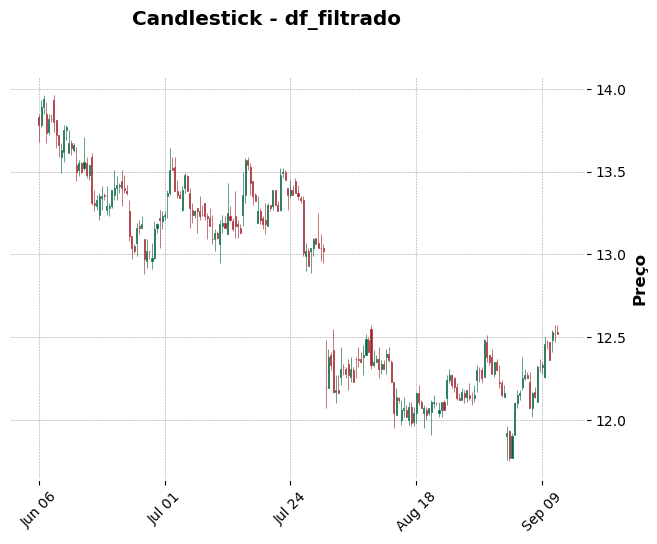

In [54]:
import mplfinance as mpf

# Converter coluna <TIME> em timedelta
# assumindo formato HH:MM:SS ou HH:MM
df_filtrado['<TIME>'] = pd.to_timedelta(df_filtrado['<TIME>'])

# Criar coluna datetime combinando <DATE> (datetime) + <TIME> (timedelta)
df_filtrado['datetime'] = df_filtrado['<DATE>'] + df_filtrado['<TIME>']

# Definir datetime como índice
df_filtrado.set_index('datetime', inplace=True)

# Selecionar colunas necessárias
df_candles = df_filtrado[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']]
df_candles.columns = ['Open', 'High', 'Low', 'Close']

# Plotar candles
mpf.plot(df_candles,
         type='candle',
         style='charles',
         volume=False,
         title='Candlestick - df_filtrado',
         ylabel='Preço')


In [55]:
#!pip install mplfinance